<a href="https://colab.research.google.com/github/Gui-Rigaud/hateful-speech-detection/blob/feat%2Feda%2Bfeature_extraction/Detec%C3%A7%C3%A3o_de_Fake_News_Projeto_CIN0144.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instalação de Bibliotecas

In [61]:
%pip install transformers
%pip install seaborn

In [62]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

sns.set_theme(style="whitegrid", palette="Set2", color_codes=True)

## Análise Exploratória dos Dados

In [63]:
from sklearn.model_selection import train_test_split

train_file_path = 'https://raw.githubusercontent.com/EduardoCavValenca/Automatic-Detection-of-Fake-News-in-Portuguese/main/data/csvs/train.csv'
df_train = pd.read_csv(train_file_path)
y_train = df_train['label']
X_train = df_train['content']

test_file_path = 'https://raw.githubusercontent.com/EduardoCavValenca/Automatic-Detection-of-Fake-News-in-Portuguese/main/data/csvs/test.csv'
df_test = pd.read_csv(test_file_path)
y_test = df_test['label']
X_test = df_test['content']

In [64]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5760 entries, 0 to 5759
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   content  5760 non-null   object 
 1   label    5760 non-null   int64  
 2   rating   5760 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 135.1+ KB


In [65]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   content          1440 non-null   object 
 1   label            1440 non-null   int64  
 2   rating           1440 non-null   float64
 3   predicted_label  1440 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 45.1+ KB


In [66]:
df_train.head()

,content,label,rating
0,﻿juiz determina soltura de 4 presos por pensão...,1,0.031619
1,"pivô do mensalão, jefferson não assistiu à tra...",1,0.033124
2,oficial da reserva avisa: se a lei do impeachm...,0,0.008723
3,bolsonaro vai para o psl e liberais abandonam ...,1,0.016806
4,"por maioria de votos, os ministros da 2.a tur...",1,0.021402


In [67]:
df_test.head()

,content,label,rating,predicted_label
0,começou a baderna! apoiadores de lula são pego...,0,0.000000,0
1,eike deixou o país com passaporte alemão e pod...,0,0.000000,0
2,delcídio dá entrevista e confirma quem são os ...,0,0.000000,0
3,urgente: mtst invade prédio oficial da presidê...,0,0.030483,0
4,"em 2009, barbosa alertou: gilmar mendes está d...",0,0.000000,0


In [68]:
print("Tamanho do conjunto de TREINO:")
print("Textos:", len(df_train))
print("Rótulos:", len(df_train))

print("Tamanho do conjunto de TESTE:")
print("Textos:", len(df_train))
print("Rótulos:", len(df_train))

Tamanho do conjunto de TREINO:
Textos: 5760
Rótulos: 5760
Tamanho do conjunto de TESTE:
Textos: 5760
Rótulos: 5760


In [69]:
# Identificando valores nulos

# Conjunto de treino
print("\nValores Nulos:")
print("\nTreino")
print(df_train.isnull().sum())

# Conjunto de teste
print("\nTeste")
print(df_train.isnull().sum())


Valores Nulos:

Treino
content    0
label      0
rating     0
dtype: int64

Teste
content    0
label      0
rating     0
dtype: int64


In [70]:
# Contagem de textos duplicados no conjunto de treino
duplicates_train = df_train.duplicated(subset=['content']).sum()
print(f"Número de textos duplicados no conjunto de treino: {duplicates_train}")

# Contagem de textos duplicados no conjunto de teste
duplicates_test = df_test.duplicated(subset=['content']).sum()
print(f"Número de textos duplicados no conjunto de teste: {duplicates_test}")


Número de textos duplicados no conjunto de treino: 1
Número de textos duplicados no conjunto de teste: 0


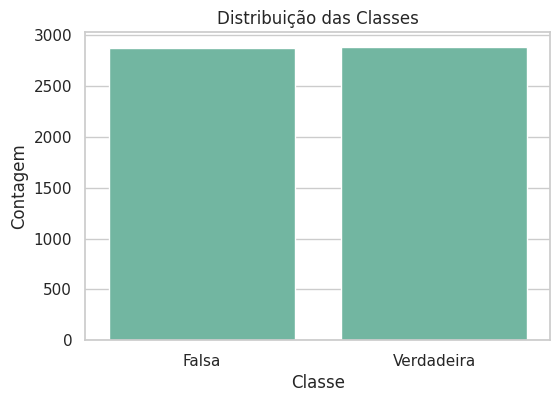

In [71]:
class_distribution = df_train['label'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.title('Distribuição das Classes')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.xticks(ticks=[0, 1], labels=['Falsa', 'Verdadeira'])
plt.show()

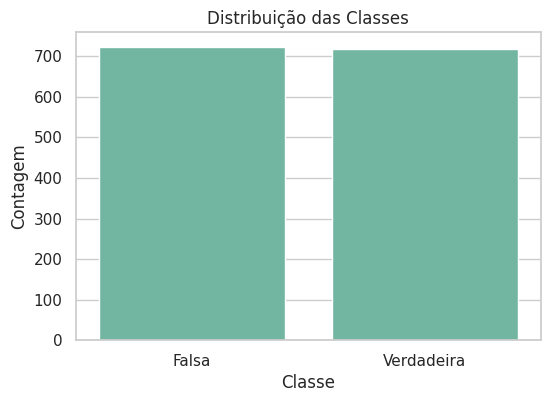

In [72]:
class_distribution = df_test['label'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.title('Distribuição das Classes')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.xticks(ticks=[0, 1], labels=['Falsa', 'Verdadeira'])
plt.show()

In [73]:
df_train['text_length'] = df_train['content'].apply(len)
df_test['text_length'] = df_test['content'].apply(len)

print("Added 'text_length' column to df_train. Head of df_train:")
print(df_train.head())
print("\nAdded 'text_length' column to df_test. Head of df_test:")
print(df_test.head())

Added 'text_length' column to df_train. Head of df_train:
                                             content  label    rating  \
0  ﻿juiz determina soltura de 4 presos por pensão...      1  0.031619   
1  pivô do mensalão, jefferson não assistiu à tra...      1  0.033124   
2  oficial da reserva avisa: se a lei do impeachm...      0  0.008723   
3  bolsonaro vai para o psl e liberais abandonam ...      1  0.016806   
4   por maioria de votos, os ministros da 2.a tur...      1  0.021402   

   text_length  
0         4535  
1         4062  
2         1338  
3         5669  
4         3219  

Added 'text_length' column to df_test. Head of df_test:
                                             content  label    rating  \
0  começou a baderna! apoiadores de lula são pego...      0  0.000000   
1  eike deixou o país com passaporte alemão e pod...      0  0.000000   
2  delcídio dá entrevista e confirma quem são os ...      0  0.000000   
3  urgente: mtst invade prédio oficial da presidê...

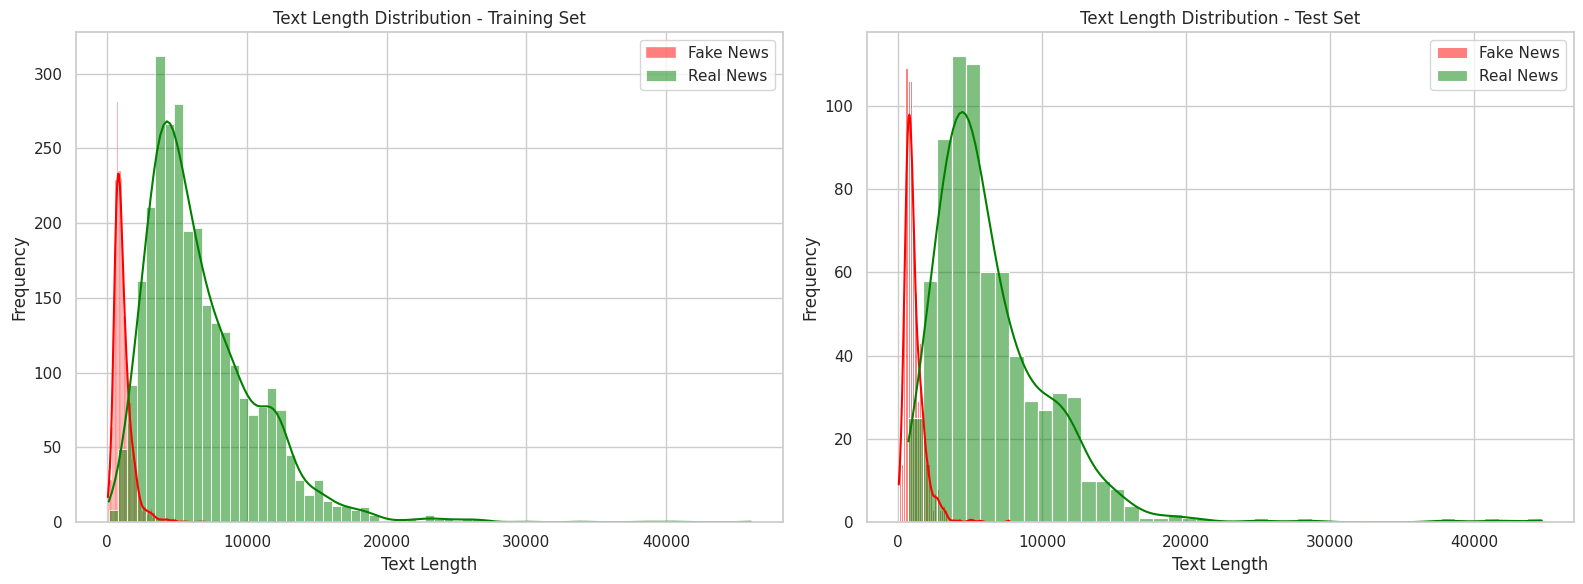

Text length distribution plots generated for training and test sets.


In [74]:
df_train_fake = df_train[df_train['label'] == 0]
df_train_real = df_train[df_train['label'] == 1]

df_test_fake = df_test[df_test['label'] == 0]
df_test_real = df_test[df_test['label'] == 1]

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(df_train_fake['text_length'], color="red", label="Fake News", kde=True, ax=axes[0])
sns.histplot(df_train_real['text_length'], color="green", label="Real News", kde=True, ax=axes[0])
axes[0].set_title('Text Length Distribution - Training Set')
axes[0].set_xlabel('Text Length')
axes[0].set_ylabel('Frequency')
axes[0].legend()

sns.histplot(df_test_fake['text_length'], color="red", label="Fake News", kde=True, ax=axes[1])
sns.histplot(df_test_real['text_length'], color="green", label="Real News", kde=True, ax=axes[1])
axes[1].set_title('Text Length Distribution - Test Set')
axes[1].set_xlabel('Text Length')
axes[1].set_ylabel('Frequency')
axes[1].legend()

plt.tight_layout()
plt.show()

print("Text length distribution plots generated for training and test sets.")

In [75]:
df_train['word_count'] = df_train['content'].apply(lambda x: len(x.split()))
df_test['word_count'] = df_test['content'].apply(lambda x: len(x.split()))

print("Added 'word_count' column to df_train. Head of df_train:")
print(df_train.head())
print("\nAdded 'word_count' column to df_test. Head of df_test:")
print(df_test.head())

Added 'word_count' column to df_train. Head of df_train:
                                             content  label    rating  \
0  ﻿juiz determina soltura de 4 presos por pensão...      1  0.031619   
1  pivô do mensalão, jefferson não assistiu à tra...      1  0.033124   
2  oficial da reserva avisa: se a lei do impeachm...      0  0.008723   
3  bolsonaro vai para o psl e liberais abandonam ...      1  0.016806   
4   por maioria de votos, os ministros da 2.a tur...      1  0.021402   

   text_length  word_count  
0         4535         727  
1         4062         668  
2         1338         224  
3         5669         917  
4         3219         500  

Added 'word_count' column to df_test. Head of df_test:
                                             content  label    rating  \
0  começou a baderna! apoiadores de lula são pego...      0  0.000000   
1  eike deixou o país com passaporte alemão e pod...      0  0.000000   
2  delcídio dá entrevista e confirma quem são os ...   

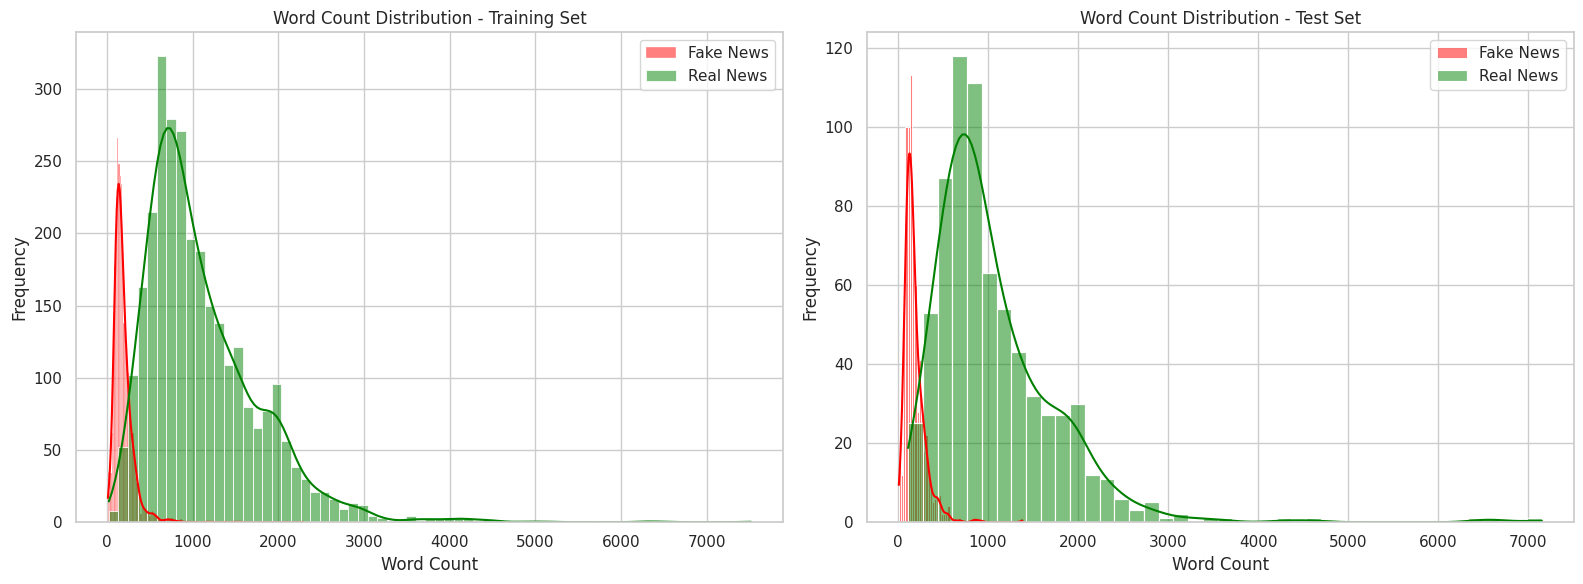

Word count distribution plots generated for training and test sets.


In [76]:
df_train_fake = df_train[df_train['label'] == 0]
df_train_real = df_train[df_train['label'] == 1]

df_test_fake = df_test[df_test['label'] == 0]
df_test_real = df_test[df_test['label'] == 1]

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(df_train_fake['word_count'], color="red", label="Fake News", kde=True, ax=axes[0])
sns.histplot(df_train_real['word_count'], color="green", label="Real News", kde=True, ax=axes[0])
axes[0].set_title('Word Count Distribution - Training Set')
axes[0].set_xlabel('Word Count')
axes[0].set_ylabel('Frequency')
axes[0].legend()

sns.histplot(df_test_fake['word_count'], color="red", label="Fake News", kde=True, ax=axes[1])
sns.histplot(df_test_real['word_count'], color="green", label="Real News", kde=True, ax=axes[1])
axes[1].set_title('Word Count Distribution - Test Set')
axes[1].set_xlabel('Word Count')
axes[1].set_ylabel('Frequency')
axes[1].legend()

plt.tight_layout()
plt.show()

print("Word count distribution plots generated for training and test sets.")

## Separação dos conjuntos em treino, teste e validação

In [77]:
X_train, X_val, y_train, y_val = train_test_split(df_train["content"], df_train["label"], test_size=0.2, random_state=42)

In [78]:
# Exibindo o tamanho dos novos conjuntos
print("Conjunto de Treino:")
print("X_train size:", X_train.shape)
print("Y_train size:", y_train.shape)

print("\nConjunto de Validação:")
print("X_val size:", X_val.shape)
print("Y_val size:", y_val.shape)

print("\nConjunto de Teste:")
print("X_test size:", X_test.shape)
print("Y_test size:", y_test.shape)

Conjunto de Treino:
X_train size: (4608,)
Y_train size: (4608,)

Conjunto de Validação:
X_val size: (1152,)
Y_val size: (1152,)

Conjunto de Teste:
X_test size: (1440,)
Y_test size: (1440,)


## Limpeza dos dados

In [79]:
# Remover valores repetidos do conjunto de treino
df_train.drop_duplicates(subset=['content'], inplace=True)

print(f"Novo tamanho do conjunto de treino após remover duplicatas: {len(df_train)}")


Novo tamanho do conjunto de treino após remover duplicatas: 5759


In [80]:
import re
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords if not already downloaded
try:
    stopwords.words('portuguese')
except LookupError:
    nltk.download('stopwords')
    print("NLTK 'stopwords' corpus downloaded.")
else:
    print("NLTK 'stopwords' corpus is already downloaded.")

NLTK 'stopwords' corpus is already downloaded.


In [81]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^À-ſ -~]', '', text) # Keep only accented characters, common punctuation, numbers and letters from the Latin-1 Supplement Unicode block
    text = re.sub(r'\W', ' ', text) # Remove punctuation and symbols, keep spaces
    text = re.sub(r'\s+', ' ', text) # Replace multiple spaces with a single space
    text = text.strip() # Remove leading/trailing whitespace

    # Handle specific patterns if needed, for example, multiple dots or other common noise
    text = re.sub(r'\.{2,}', '.', text) # Replace multiple dots with a single dot

    # Remove stopwords
    stop_words = set(stopwords.words('portuguese'))
    tokens = text.split()
    text = ' '.join([word for word in tokens if word not in stop_words])
    return text

# Apply the cleaning function
X_train = X_train.apply(clean_text)
X_val = X_val.apply(clean_text)
X_test = X_test.apply(clean_text)

# Create new DataFrames with cleaned content and labels
df_train_cleaned = pd.DataFrame({'cleaned_content': X_train, 'label': y_train})
df_val_cleaned = pd.DataFrame({'cleaned_content': X_val, 'label': y_val})
df_test_cleaned = pd.DataFrame({'cleaned_content': X_test, 'label': y_test})

# Separate cleaned content by label for train, validation, and test sets
X_train_fake_cleaned = df_train_cleaned[df_train_cleaned['label'] == 0]['cleaned_content']
X_train_real_cleaned = df_train_cleaned[df_train_cleaned['label'] == 1]['cleaned_content']

X_val_fake_cleaned = df_val_cleaned[df_val_cleaned['label'] == 0]['cleaned_content']
X_val_real_cleaned = df_val_cleaned[df_val_cleaned['label'] == 1]['cleaned_content']

X_test_fake_cleaned = df_test_cleaned[df_test_cleaned['label'] == 0]['cleaned_content']
X_test_real_cleaned = df_test_cleaned[df_test_cleaned['label'] == 1]['cleaned_content']

print("Text cleaning and separation by label completed for all datasets.")
print("Head of X_train:")
print(X_train.head())
print("\nHead of X_train_fake_cleaned:")
print(X_train_fake_cleaned.head())

Text cleaning and separation by label completed for all datasets.
Head of X_train:
387     veja leia íntegra pronunciamento temer sobre d...
4362    travessia infância adolescência internado inst...
4397    força tarefa operação lava jato cruzou documen...
4665    insanidade lula prenderem viro herói deixarem ...
2057    ex ministro dilma vazava informações privilegi...
Name: content, dtype: object

Head of X_train_fake_cleaned:
4665    insanidade lula prenderem viro herói deixarem ...
2057    ex ministro dilma vazava informações privilegi...
3166    ministro coreia nova york declarou guerra eua ...
2146    gráficas movimentaram r 52 milhões campanha di...
3103    lula admite condenado novos crimes pf mp inven...
Name: cleaned_content, dtype: object


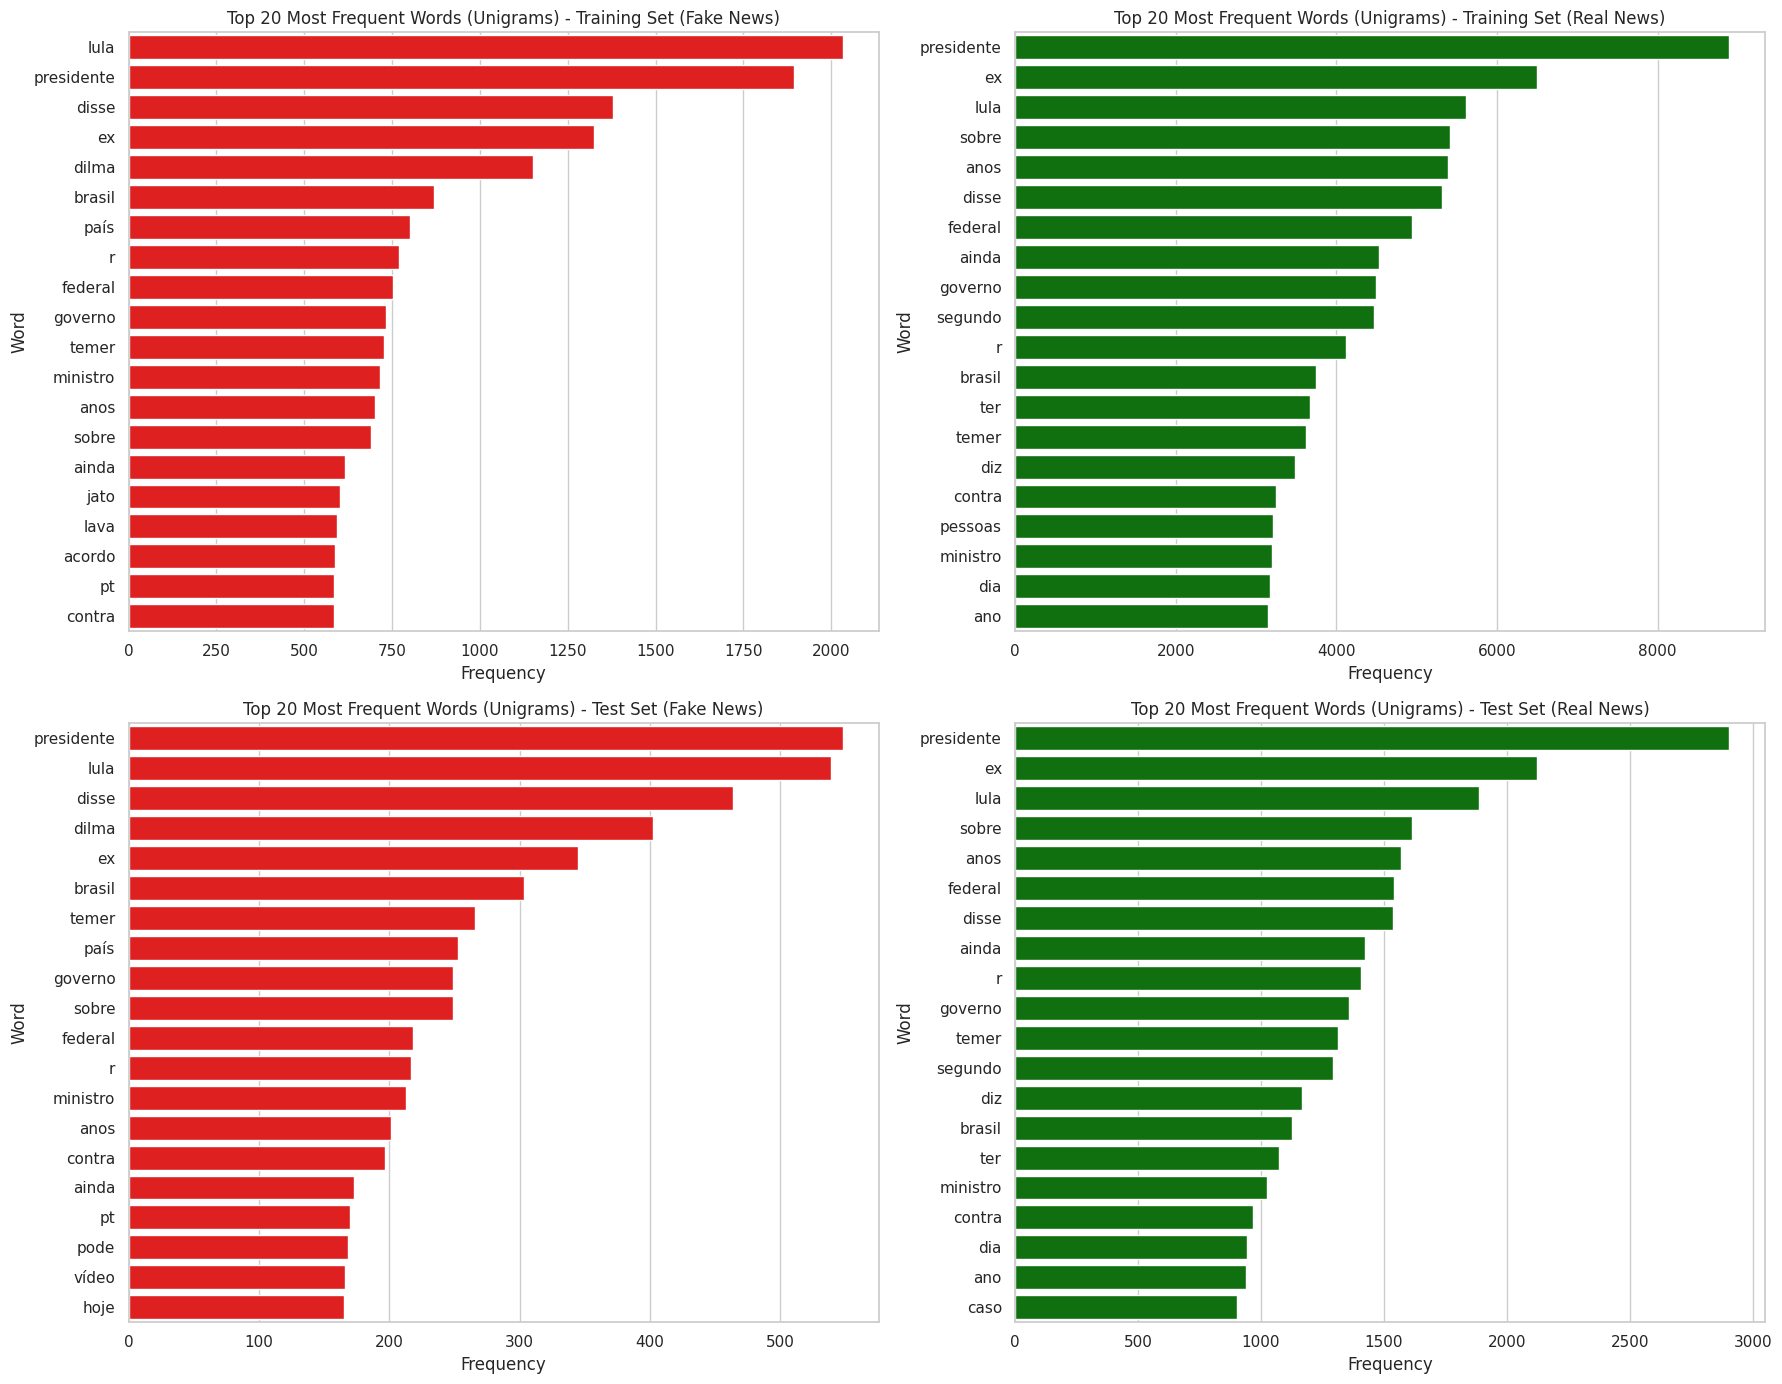

Top 20 most frequent unigrams for fake and real news in training and test sets are displayed.


In [82]:
from collections import Counter

def get_top_n_words(text_series, n=20):
    all_words = ' '.join(text_series).split()
    word_counts = Counter(all_words)
    return word_counts.most_common(n)

# Get top 20 most common words for each category and dataset
top_fake_train_words = get_top_n_words(X_train_fake_cleaned)
top_real_train_words = get_top_n_words(X_train_real_cleaned)
top_fake_test_words = get_top_n_words(X_test_fake_cleaned)
top_real_test_words = get_top_n_words(X_test_real_cleaned)

# Prepare data for plotting
def prepare_plot_data(top_words):
    words = [word for word, count in top_words]
    counts = [count for word, count in top_words]
    return pd.DataFrame({'Word': words, 'Count': counts})

df_top_fake_train = prepare_plot_data(top_fake_train_words)
df_top_real_train = prepare_plot_data(top_real_train_words)
df_top_fake_test = prepare_plot_data(top_fake_test_words)
df_top_real_test = prepare_plot_data(top_real_test_words)

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# Training Set - Fake News
sns.barplot(x='Count', y='Word', data=df_top_fake_train, ax=axes[0, 0], color='red')
axes[0, 0].set_title('Top 20 Most Frequent Words (Unigrams) - Training Set (Fake News)')
axes[0, 0].set_xlabel('Frequency')
axes[0, 0].set_ylabel('Word')

# Training Set - Real News
sns.barplot(x='Count', y='Word', data=df_top_real_train, ax=axes[0, 1], color='green')
axes[0, 1].set_title('Top 20 Most Frequent Words (Unigrams) - Training Set (Real News)')
axes[0, 1].set_xlabel('Frequency')
axes[0, 1].set_ylabel('Word')

# Test Set - Fake News
sns.barplot(x='Count', y='Word', data=df_top_fake_test, ax=axes[1, 0], color='red')
axes[1, 0].set_title('Top 20 Most Frequent Words (Unigrams) - Test Set (Fake News)')
axes[1, 0].set_xlabel('Frequency')
axes[1, 0].set_ylabel('Word')

# Test Set - Real News
sns.barplot(x='Count', y='Word', data=df_top_real_test, ax=axes[1, 1], color='green')
axes[1, 1].set_title('Top 20 Most Frequent Words (Unigrams) - Test Set (Real News)')
axes[1, 1].set_xlabel('Frequency')
axes[1, 1].set_ylabel('Word')

plt.tight_layout()
plt.show()

print("Top 20 most frequent unigrams for fake and real news in training and test sets are displayed.")

In [83]:
from wordcloud import WordCloud
import matplotlib.colors

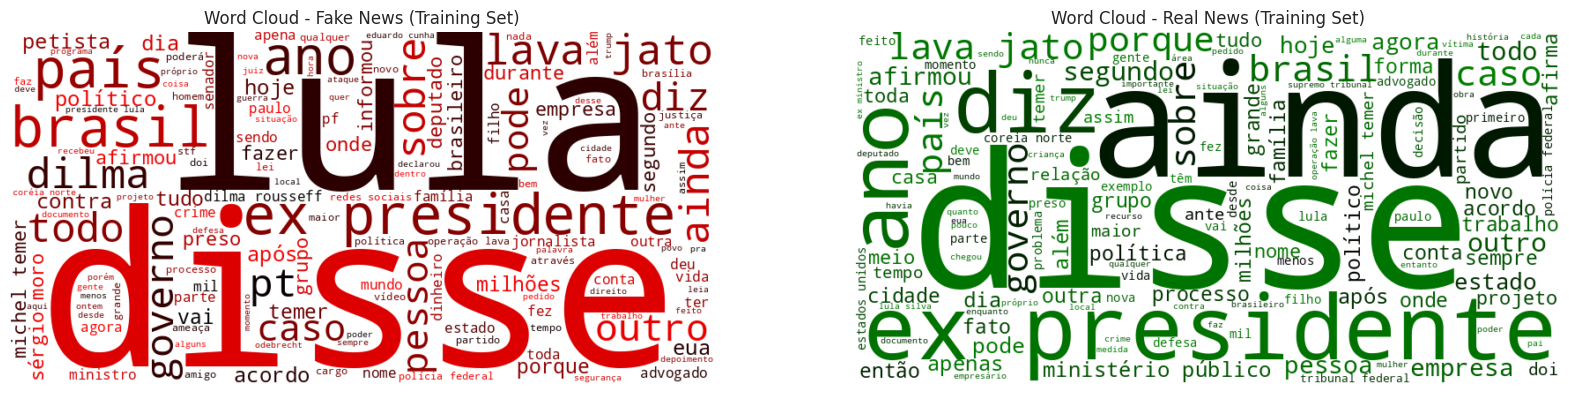

Word clouds for fake and real news in the training set have been generated and displayed.


In [84]:
cmap_fake = matplotlib.colors.LinearSegmentedColormap.from_list("cmap_fake", ["#000000", "#8b0000", "#ff0000"]) # Black to dark red to red
cmap_real = matplotlib.colors.LinearSegmentedColormap.from_list("cmap_real", ["#000000", "#006400", "#008000"]) # Black to dark green to green

# Create a single string of all cleaned fake news words for the training set
all_fake_train_words = ' '.join(X_train_fake_cleaned.astype(str))

# Create a single string of all cleaned real news words for the training set
all_real_train_words = ' '.join(X_train_real_cleaned.astype(str))

# Generate word cloud for fake news
wordcloud_fake = WordCloud(width=800, height=400, background_color='white', colormap=cmap_fake, min_font_size=10).generate(all_fake_train_words)

# Generate word cloud for real news
wordcloud_real = WordCloud(width=800, height=400, background_color='white', colormap=cmap_real, min_font_size=10).generate(all_real_train_words)

# Display both word clouds side-by-side
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.title('Word Cloud - Fake News (Training Set)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.title('Word Cloud - Real News (Training Set)')
plt.axis('off')

plt.show()

print("Word clouds for fake and real news in the training set have been generated and displayed.")

In [85]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_bigrams(text_series, n=20):
    vectorizer = CountVectorizer(ngram_range=(2, 2))
    bigram_counts_matrix = vectorizer.fit_transform(text_series)
    bigram_names = vectorizer.get_feature_names_out()
    sum_bigram_counts = bigram_counts_matrix.sum(axis=0)
    bigram_counts = [(bigram_names[i], sum_bigram_counts[0, i]) for i in range(len(bigram_names))]
    bigram_counts = sorted(bigram_counts, key=lambda x: x[1], reverse=True)
    return bigram_counts[:n]

# Get top 20 most common bigrams for each category and dataset
top_fake_train_bigrams = get_top_n_bigrams(X_train_fake_cleaned)
top_real_train_bigrams = get_top_n_bigrams(X_train_real_cleaned)
top_fake_test_bigrams = get_top_n_bigrams(X_test_fake_cleaned)
top_real_test_bigrams = get_top_n_bigrams(X_test_real_cleaned)

# Prepare data for plotting
def prepare_plot_data_bigrams(top_bigrams):
    bigrams = [bigram for bigram, count in top_bigrams]
    counts = [count for bigram, count in top_bigrams]
    return pd.DataFrame({'Bigram': bigrams, 'Count': counts})

df_top_fake_train_bigrams = prepare_plot_data_bigrams(top_fake_train_bigrams)
df_top_real_train_bigrams = prepare_plot_data_bigrams(top_real_train_bigrams)
df_top_fake_test_bigrams = prepare_plot_data_bigrams(top_fake_test_bigrams)
df_top_real_test_bigrams = prepare_plot_data_bigrams(top_real_test_bigrams)

print("Top 20 most frequent bigrams extracted and prepared for plotting for all datasets.")


Top 20 most frequent bigrams extracted and prepared for plotting for all datasets.


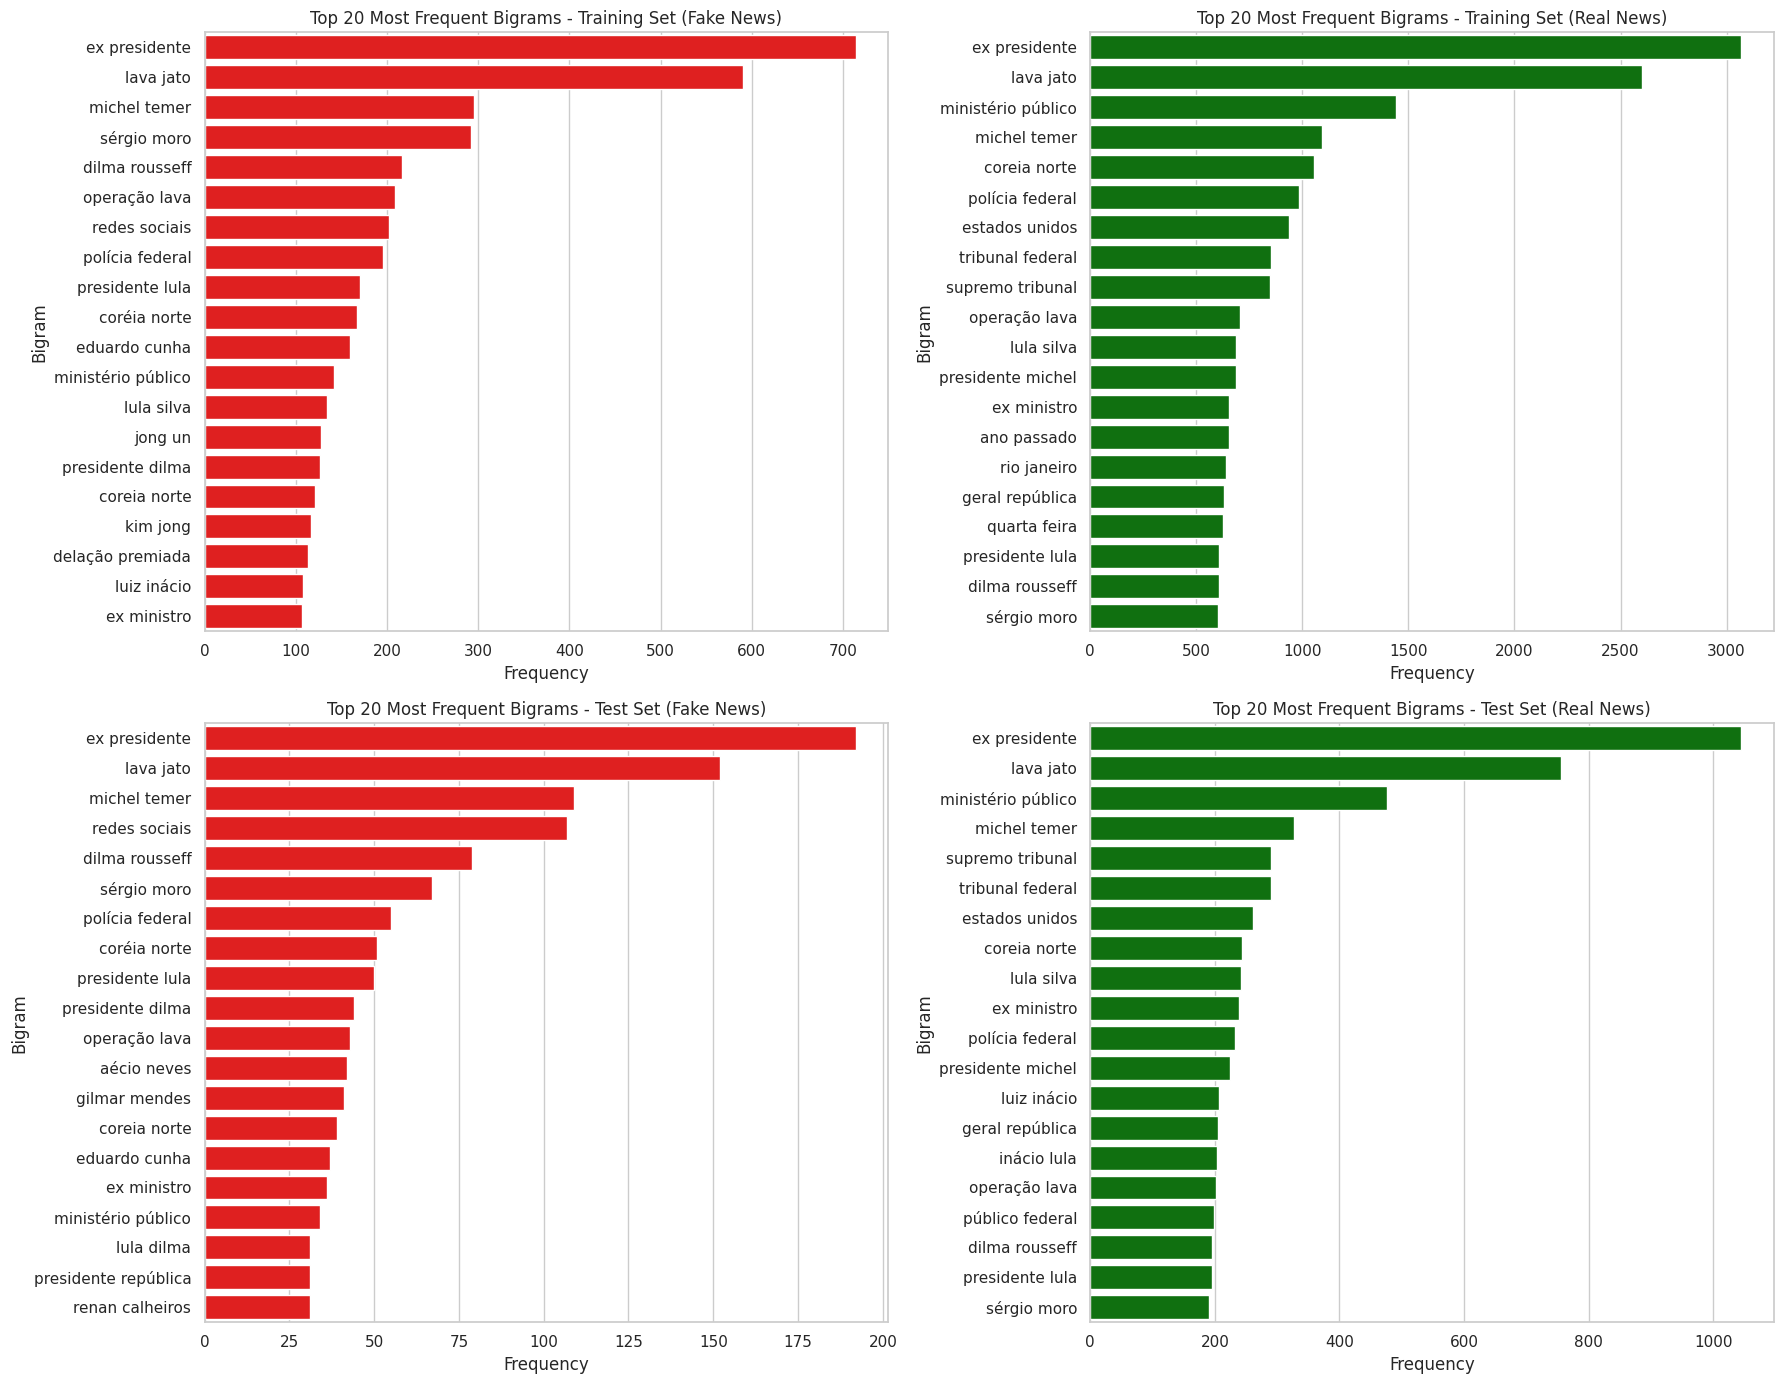

Top 20 most frequent bigrams for fake and real news in training and test sets are displayed.


In [86]:
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# Training Set - Fake News Bigrams
sns.barplot(x='Count', y='Bigram', data=df_top_fake_train_bigrams, ax=axes[0, 0], color='red')
axes[0, 0].set_title('Top 20 Most Frequent Bigrams - Training Set (Fake News)')
axes[0, 0].set_xlabel('Frequency')
axes[0, 0].set_ylabel('Bigram')

# Training Set - Real News Bigrams
sns.barplot(x='Count', y='Bigram', data=df_top_real_train_bigrams, ax=axes[0, 1], color='green')
axes[0, 1].set_title('Top 20 Most Frequent Bigrams - Training Set (Real News)')
axes[0, 1].set_xlabel('Frequency')
axes[0, 1].set_ylabel('Bigram')

# Test Set - Fake News Bigrams
sns.barplot(x='Count', y='Bigram', data=df_top_fake_test_bigrams, ax=axes[1, 0], color='red')
axes[1, 0].set_title('Top 20 Most Frequent Bigrams - Test Set (Fake News)')
axes[1, 0].set_xlabel('Frequency')
axes[1, 0].set_ylabel('Bigram')

# Test Set - Real News Bigrams
sns.barplot(x='Count', y='Bigram', data=df_top_real_test_bigrams, ax=axes[1, 1], color='green')
axes[1, 1].set_title('Top 20 Most Frequent Bigrams - Test Set (Real News)')
axes[1, 1].set_xlabel('Frequency')
axes[1, 1].set_ylabel('Bigram')

plt.tight_layout()
plt.show()

print("Top 20 most frequent bigrams for fake and real news in training and test sets are displayed.")

## Extração de Características

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X_train_vector = vectorizer.fit_transform(X_train)
X_test_vector = vectorizer.transform(X_test)
X_val_vector = vectorizer.transform(X_val)

In [88]:
print(X_train_vector.shape)
print(X_test_vector.shape)
print(X_val_vector.shape)

(4608, 71956)
(1440, 71956)
(1152, 71956)


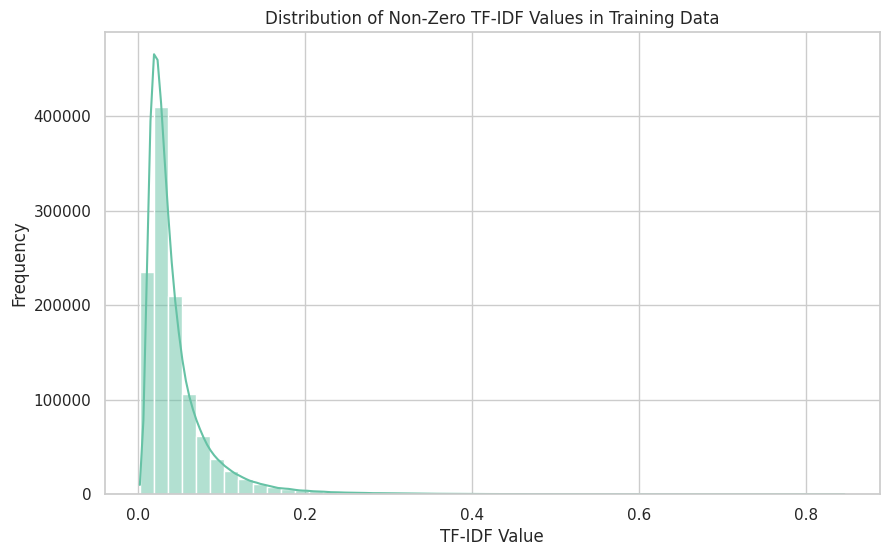

Minimum TF-IDF value: 0.0022
Maximum TF-IDF value: 0.8455
Mean TF-IDF value: 0.0455
Standard Deviation of TF-IDF values: 0.0442


In [89]:
# Get non-zero values from the sparse matrix
# TF-IDF vectors are typically sparse, so visualizing all zeros is not informative.
non_zero_values = X_train_vector.data

plt.figure(figsize=(10, 6))
sns.histplot(non_zero_values, bins=50, kde=True)
plt.title('Distribution of Non-Zero TF-IDF Values in Training Data')
plt.xlabel('TF-IDF Value')
plt.ylabel('Frequency')
plt.show()

print(f"Minimum TF-IDF value: {np.min(non_zero_values):.4f}")
print(f"Maximum TF-IDF value: {np.max(non_zero_values):.4f}")
print(f"Mean TF-IDF value: {np.mean(non_zero_values):.4f}")
print(f"Standard Deviation of TF-IDF values: {np.std(non_zero_values):.4f}")


## Tokenização

In [95]:
from transformers import BertTokenizer, BertModel
import torch
from google.colab import userdata

# Get HuggingFace token from Colab secrets
hf_token = userdata.get('HF_TOKEN')

# Initialize tokenizer and model with the token
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', token=hf_token)
model = BertModel.from_pretrained('bert-base-uncased', token=hf_token)

def get_bert_embeddings(text):
    # Gera as inputs como tensores PyTorch com truncamento e comprimento máximo de 512 tokens
    inputs = tokenizer(text, padding=True, truncation=True, max_length=512, return_tensors="pt")
    # Passa os tensores para o modelo
    outputs = model(**inputs)
    # Calcula a média sobre a dimensão das sequências e converte para NumPy
    return outputs.last_hidden_state.mean(dim=1).detach().numpy()

print("Generating BERT embeddings. This might take a while...")
# Obtenha os embeddings para o conjunto de treino, teste e validação
X_train_bert_embeddings = [get_bert_embeddings(text) for text in X_train]
X_test_bert_embeddings = [get_bert_embeddings(text) for text in X_test]
X_val_bert_embeddings = [get_bert_embeddings(text) for text in X_val]
print("BERT embeddings generation complete.")

Generating BERT embeddings. This might take a while...


KeyboardInterrupt: 

In [ ]:
X_train_bert_embeddings_save = np.array(X_train_bert_embeddings)
X_test_bert_embeddings_save = np.array(X_test_bert_embeddings)
X_val_bert_embeddings_save = np.array(X_val_bert_embeddings)

# Salvando os embeddings
np.save('X_train_bert_embeddings.npy', X_train_bert_embeddings_save)
np.save('X_test_bert_embeddings.npy', X_test_bert_embeddings_save)
np.save('X_val_bert_embeddings.npy', X_val_bert_embeddings_save)
print("Embeddings salvos!")

In [ ]:
# Carregando os embeddings salvos
X_train_bert_embeddings = np.load('/content/X_train_bert_embeddings.npy')
X_test_bert_embeddings = np.load('/content/X_test_bert_embeddings.npy')
X_val_bert_embeddings = np.load('/content/X_val_bert_embeddings.npy')


print("Tamanho dos embeddings de treino:", X_train_bert_embeddings.shape)
print("Tamanho dos embeddings de teste:", X_test_bert_embeddings.shape)
print("Tamanho dos embeddings de validação:", X_val_bert_embeddings.shape)